In [4]:
import numpy as np
import pandas as pd
import os
import gc

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train = pd.read_csv("./data/train.csv")
test = pd.read_csv("./data/test.csv")

In [5]:
train_id = train[["ID", "target"]].copy()

del train
gc.collect()

21

In [9]:
"0123456789abcdef".index("a")

10

In [27]:
def to_int(str16bit):
    try:
        result = 0
        for tok in str16bit:
            result *= 16
            result += "0123456789abcdef".index(tok)
    except:
        print("Error", str16bit)
    return result

In [14]:
train_id["int_id"] = train_id.ID.apply(to_int)

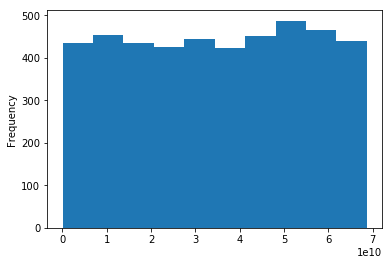

In [19]:
train_id.int_id.plot(kind="hist")
plt.show()

In [28]:
test_id = test[["ID"]].copy()
test_id["int_id"] = test_id.ID.apply(to_int)
test_id.head()

Error 0.0


,ID,int_id
0,000137c73,1277043
1,00021489f,2181279
2,0004d7953,5077331
3,00056a333,5677875
4,00056d8eb,5691627


In [31]:
test[test.ID == "0.0"]

,ID,48df886f9,0deb4b6a8,34b15f335,a8cb14b00,2f0771a37,30347e683,d08d1fbe3,6ee66e115,20aa07010,...,3ecc09859,9281abeea,8675bec0b,3a13ed79a,f677d4d13,71b203550,137efaa80,fb36b89d9,7e293fbaf,9fc776466
49342,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


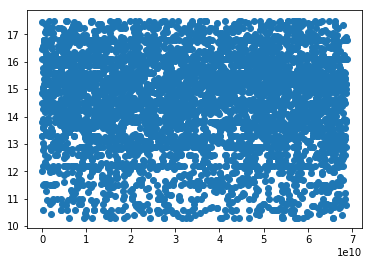

In [35]:
x = train_id.int_id.sort_values().values
y = np.log1p(train_id.sort_values("int_id").target.values)

plt.scatter(x, y)
plt.show()

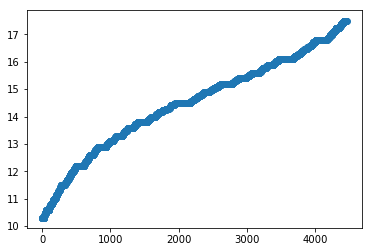

In [37]:
y = np.log1p(train_id.sort_values("target").target.values)
x = np.arange(len(y))

plt.scatter(x, y)
plt.show()

In [41]:
train_id.sort_values("target").target.value_counts().sort_values()

2968000.00       1
2580000.00       1
8057500.00       1
2842000.00       1
16200000.00      1
3266666.66       1
468571.42        1
5225000.00       1
920000.00        1
1186666.66       1
306000.00        1
1988666.66       1
12400000.00      1
858000.00        1
3627000.00       1
22200000.00      1
1879000.00       1
155000.00        1
6140000.00       1
5223600.00       1
342000.00        1
429000.00        1
2318000.00       1
8780000.00       1
1175000.00       1
5933333.34       1
237000.00        1
1945000.00       1
866000.00        1
153142.86        1
              ... 
15000000.00     21
60000.00        24
50000.00        25
30000.00        26
1800000.00      28
700000.00       28
1500000.00      30
7000000.00      31
1400000.00      31
1600000.00      33
300000.00       37
30000000.00     39
500000.00       39
1200000.00      39
40000000.00     40
40000.00        40
100000.00       44
800000.00       59
3000000.00      61
8000000.00      65
600000.00       84
6000000.00  

In [54]:
train_id["target_str"] = train_id.target.apply(str)
train_id["target_tail"] = train_id.target_str.apply(lambda x: x[-5:])
train_id.head()

,ID,target,int_id,target_str,target_tail
0,000d6aaf2,38000000.0,14068466,38000000.0,000.0
1,000fbd867,600000.0,16504935,600000.0,000.0
2,0027d6b71,10000000.0,41773937,10000000.0,000.0
3,0028cbf45,2000000.0,42778437,2000000.0,000.0
4,002a68644,14400000.0,44467780,14400000.0,000.0


In [56]:
train_id.groupby("target_tail").size().sort_values()

target_tail
909.1       1
84.22       1
63.64       1
625.0       1
61.54       1
720.0       1
55.56       1
51.72       1
36.36       1
30.76       1
692.3       1
27.28       1
157.9       1
15.38       1
11.12       1
125.0       1
250.0       2
307.7       2
69.24       2
090.9       2
77.78       2
44.44       2
22.22       3
750.0       4
88.88       4
14.28       5
85.72       6
28.58       8
400.0       9
71.42       9
42.86      10
57.14      10
200.0      13
800.0      14
600.0      15
500.0      51
33.34     142
66.66     146
000.0    3982
dtype: int64

In [36]:
train_id[train_id.int_id.isin(test_id.int_id.unique())].head()

,ID,target,int_id


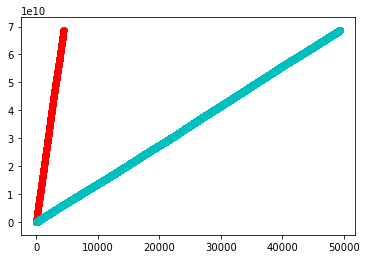

In [33]:
y = train_id.int_id.sort_values().values
x = np.arange(len(y))

plt.scatter(x, y, alpha=.5, c="r")

y_test = test_id.int_id.sort_values().values
x_test = np.arange(len(y_test))

plt.scatter(x_test, y_test, alpha=.5, c="c")

plt.show()